In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import os
%matplotlib inline

In [75]:
os.chdir(r"C:\Users\Shin Jaeuk\Desktop\멀캠 평가용 데이터")

In [76]:
df = pd.read_csv('data_concrete.csv', header='infer',encoding = 'latin1')

In [77]:
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [78]:
df.shape

(1030, 9)

C:\Users\Shin Jaeuk\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Shin Jaeuk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


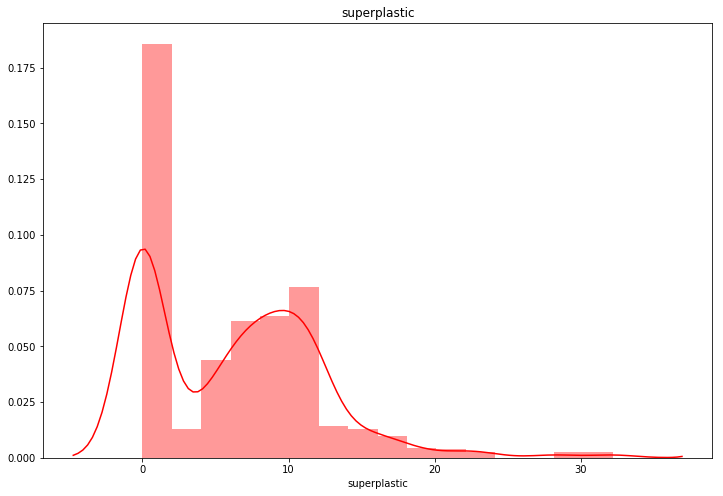

In [79]:
plt.figure(figsize=(12,8))
sns.distplot(df["superplastic"], color='red')
plt.title('superplastic')
plt.show()

In [82]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [81]:
X.head(3)

,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


### 정규화

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##### 사이킷런에서 정규화 함수 불러오기

In [45]:
from sklearn.preprocessing import normalize

In [84]:
X = normalize(X)

In [88]:
X   #numpy array가 됨

array([[0.        , 0.        , 0.12920745, ..., 0.53916194, 0.02233215,
        0.06379817],
       [0.        , 0.        , 0.12803761, ..., 0.53428042, 0.02212996,
        0.04891511],
       [0.12182282, 0.        , 0.19491652, ..., 0.50780882, 0.23082219,
        0.0344267 ],
       ...,
       [0.11479881, 0.08943437, 0.15869248, ..., 0.6423463 , 0.02305859,
        0.01951745],
       [0.14450096, 0.        , 0.13590984, ..., 0.61058814, 0.02167127,
        0.02536313],
       [0.08537756, 0.06651804, 0.1704153 , ..., 0.64691551, 0.02378678,
        0.0275247 ]])

In [90]:
X.rowname

(1030, 8)

In [95]:
X=pd.DataFrame(X) #pandas로 다시 변경

In [98]:
X.head(3)

,0,1,2,3,4,5,6,7
0,0.000000,0.0,0.129207,0.001994,0.829480,0.539162,0.022332,0.063798
1,0.000000,0.0,0.128038,0.001976,0.833825,0.534280,0.022130,0.048915
2,0.121823,0.0,0.194917,0.000000,0.796764,0.507809,0.230822,0.034427


In [112]:
X.rename(columns={X.columns[0] : 'slag',
                  X.columns[1] : 'ash' ,
                  X.columns[2] : 'water',
                  X.columns[3] : 'superplastic',
                  X.columns[4] : 'coarseagg',
                  X.columns[5] : 'fineagg',
                  X.columns[6] : 'age',
                  X.columns[7] : 'strength',}, inplace=True)    #열의 이름 다시 설정
X.head()

,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.000000,0.0,0.129207,0.001994,0.829480,0.539162,0.022332,0.063798
1,0.000000,0.0,0.128038,0.001976,0.833825,0.534280,0.022130,0.048915
2,0.121823,0.0,0.194917,0.000000,0.796764,0.507809,0.230822,0.034427
3,0.119220,0.0,0.190753,0.000000,0.779743,0.496961,0.305371,0.034344
4,0.098016,0.0,0.142138,0.000000,0.724309,0.611117,0.266508,0.032795


C:\Users\Shin Jaeuk\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Shin Jaeuk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


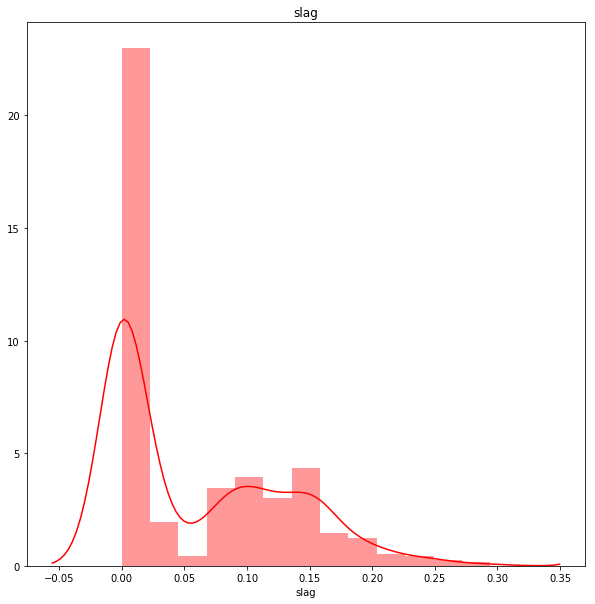

In [115]:
plt.figure(figsize=(10,10))  #정규화 되었는지 다시 확인 slag변수만 일단
sns.distplot(X["slag"], color='red')
plt.title('slag')
plt.show()